In [3]:
from functools import reduce

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns
import holoviews as hv

from regress import regress

from dataloader import load_dataset
from data_exploration import plot_happiness, plot_hdi_gdp, plot_footprint_cap, \
                            plot_hist_pop, plot_hist_gdp, plot_scatter_markbhutan
from data_analysis import plot_footprint_hap, plot_footprint_hap

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

hv.extension('bokeh')
plt.style.use('seaborn')

ModuleNotFoundError: No module named 'seaborn'

In [2]:
DATA_PATH = "./Data/data.csv"
# This function loads the cleaned dataset, or calls a function to save and clean the data, and then returns it
data = load_dataset(DATA_PATH)

# Data Exploration

## Getting to know the Data on Economic Terms (Slide 8)

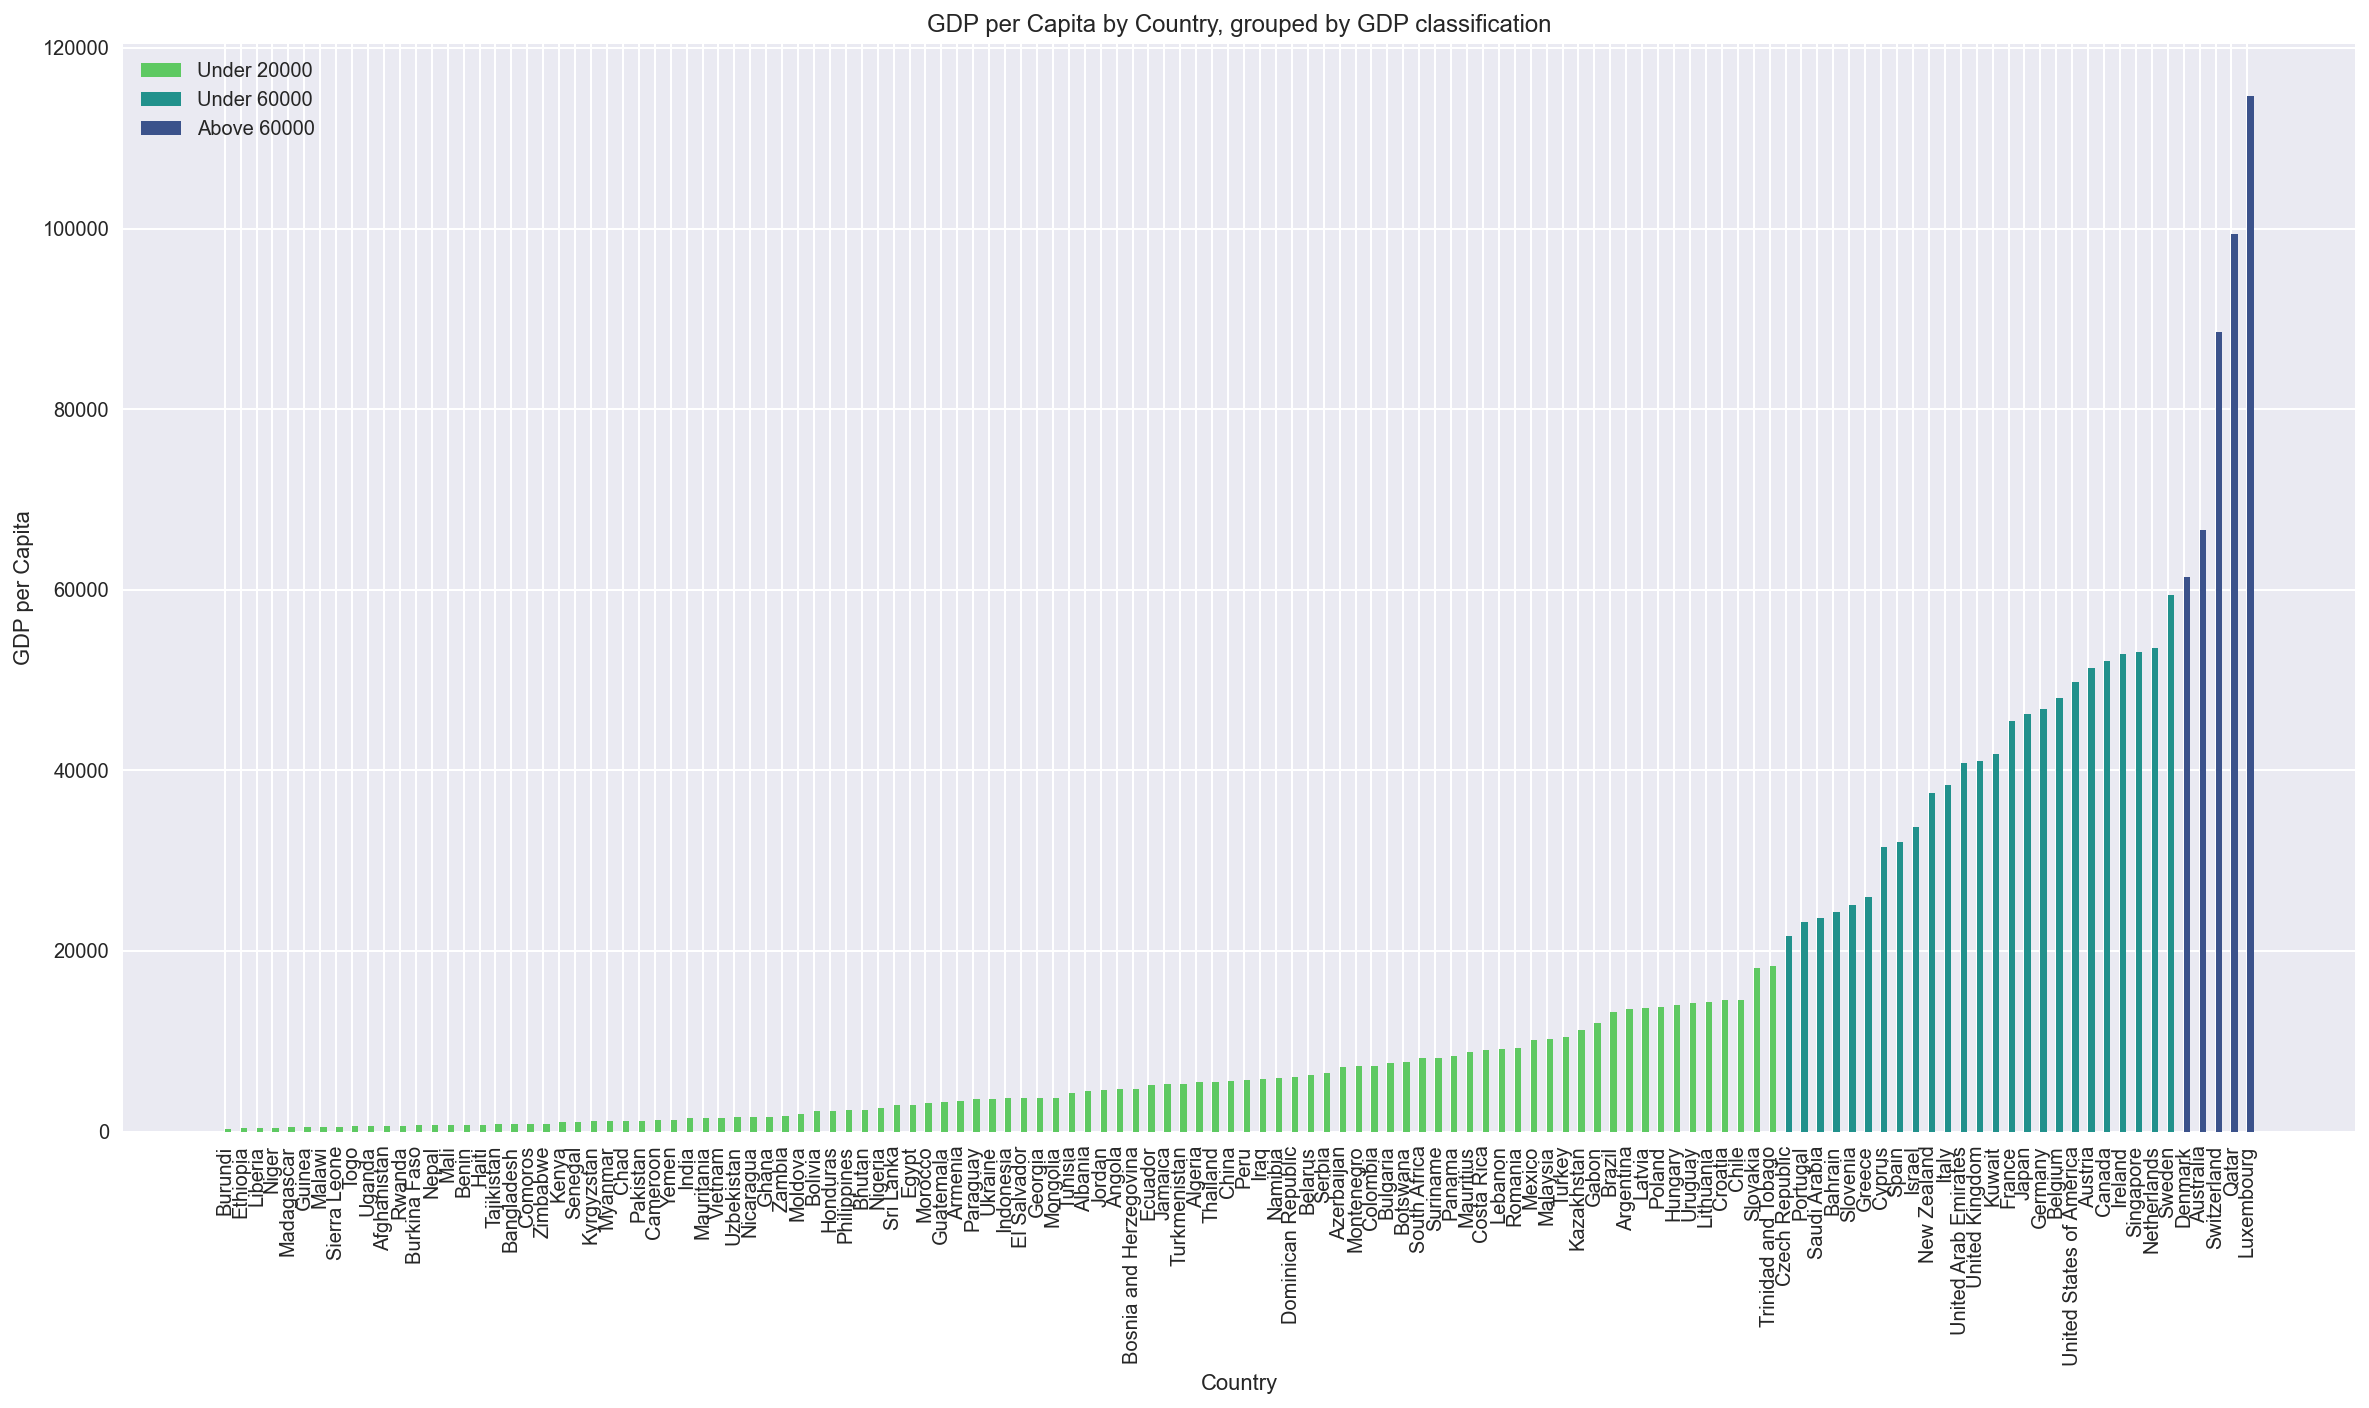

In [3]:
plot_happiness(data)

## Getting to know the Data on Economic Terms (Slide 9-12)

### HDI for each Region

In [4]:
%%opts Scatter [tools=['hover'], legend_position='right', color_index='Region_x', width=1000, height=500](alpha=0.5, color=hv.Palette('Category20'), size=10)

c = hv.Scatter(data, 'HDI', ['Region_x', 'Country', 'Population (millions)']).opts(cmap="tab10")
c.redim.range()


:Scatter   [HDI]   (Region_x,Country,Population (millions))

### GDP for each Region

In [5]:
%%opts Scatter [tools=['hover'], legend_position='right', color_index='Region_x', width=1000, height=500](alpha=0.5, color=hv.Palette('Category20'), size=10)

c = hv.Scatter(data, 'GDP per Capita', ['Region_x', 'Country', 'Population (millions)']).opts(cmap="tab10")
c.redim.range()

:Scatter   [GDP per Capita]   (Region_x,Country,Population (millions))

### Happiness Score for each Region

In [6]:
%%opts Scatter [tools=['hover'], legend_position='right', color_index='Region_x', width=1000, height=500](alpha=0.5, color=hv.Palette('Category20'), size=10)

c = hv.Scatter(data, 'Happiness Score', ['Region_x', 'Country', 'Population (millions)']).opts(cmap="tab10")
c.redim.range()

:Scatter   [Happiness Score]   (Region_x,Country,Population (millions))

### HDI vs. GDP

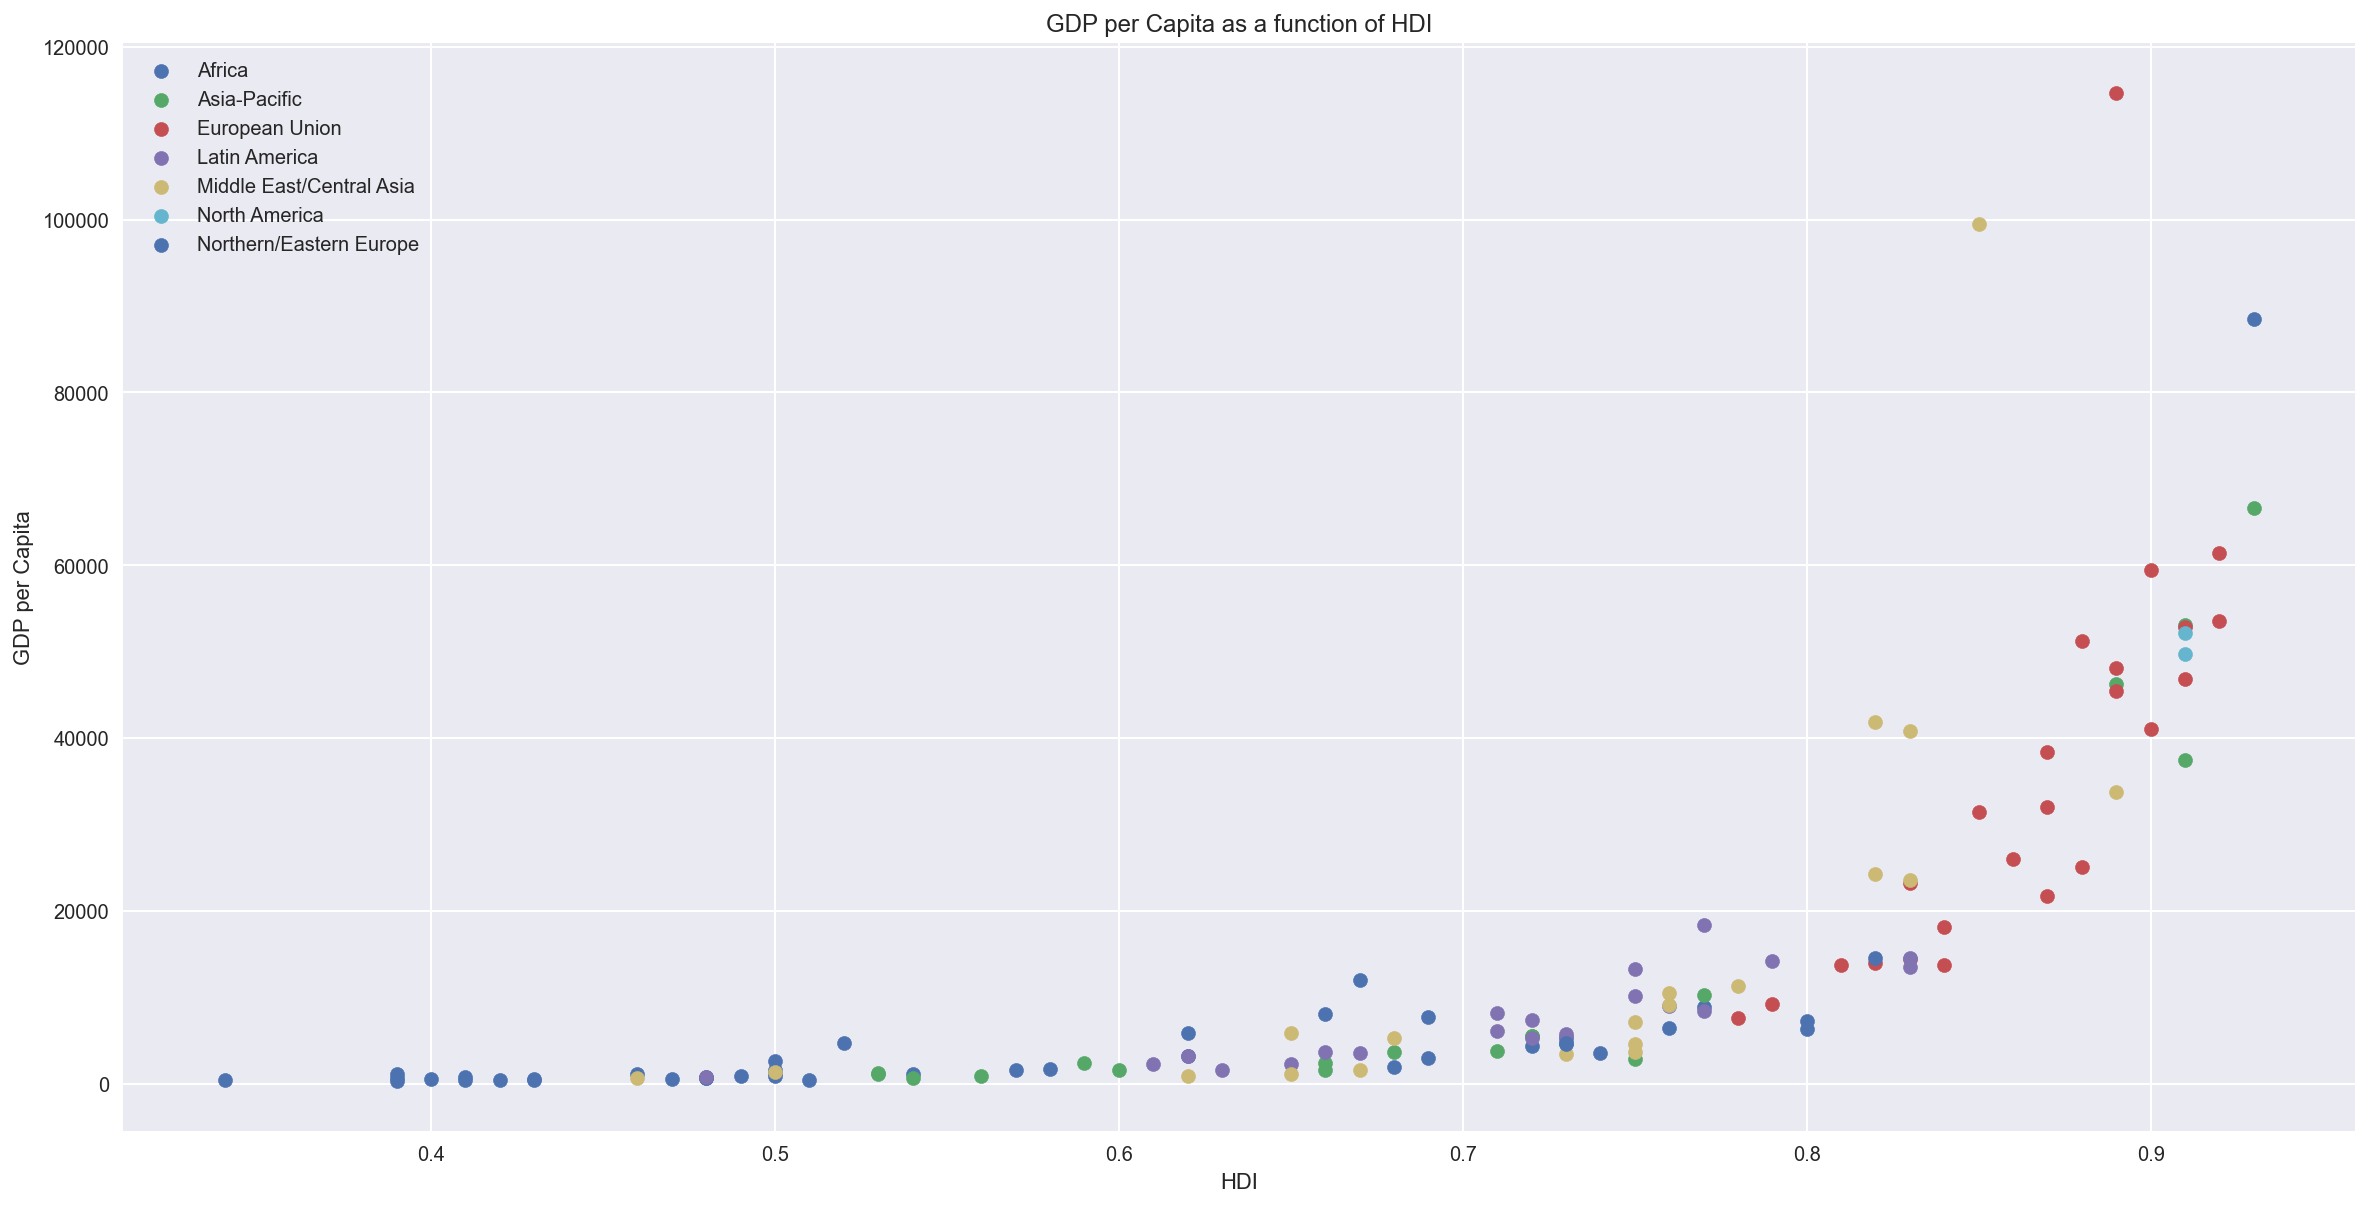

In [7]:
plot_hdi_gdp(data)

## And on Environmental Terms (slide 12)

### Earths required for each region

In [8]:
%%opts Scatter [tools=['hover'], legend_position='right', color_index='Region_x', width=1000, height=500](alpha=0.5, color=hv.Palette('Category20'), size=10)

c = hv.Scatter(data, 'Earths Required', ['Region_x', 'Country', 'Population (millions)']).opts(cmap="tab10")
c.redim.range()

:Scatter   [Earths Required]   (Region_x,Country,Population (millions))

### Total ecological footprint for each region

In [9]:
%%opts Scatter [tools=['hover'], legend_position='right', color_index='Region_x', width=1000, height=500](alpha=0.5, color=hv.Palette('Category20'), size=10)

c = hv.Scatter(data, 'Total Ecological Footprint', ['Region_x', 'Country', 'Population (millions)']).opts(cmap="tab10")
c.redim.range()

:Scatter   [Total Ecological Footprint]   (Region_x,Country,Population (millions))

In [10]:
footprints = ['Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint']

capacities = ['Cropland', 'Grazing Land', 'Forest Land', 
              'Urban Land', 'Fishing Water', 'Total Biocapacity']

# plot setup 
plt.style.use('seaborn')
style = dict(size=10, color='gray')
gdpColors = list(reversed(sns.color_palette("viridis",as_cmap=False,n_colors=6)))

### Footprints versus Capacity for each ecological category

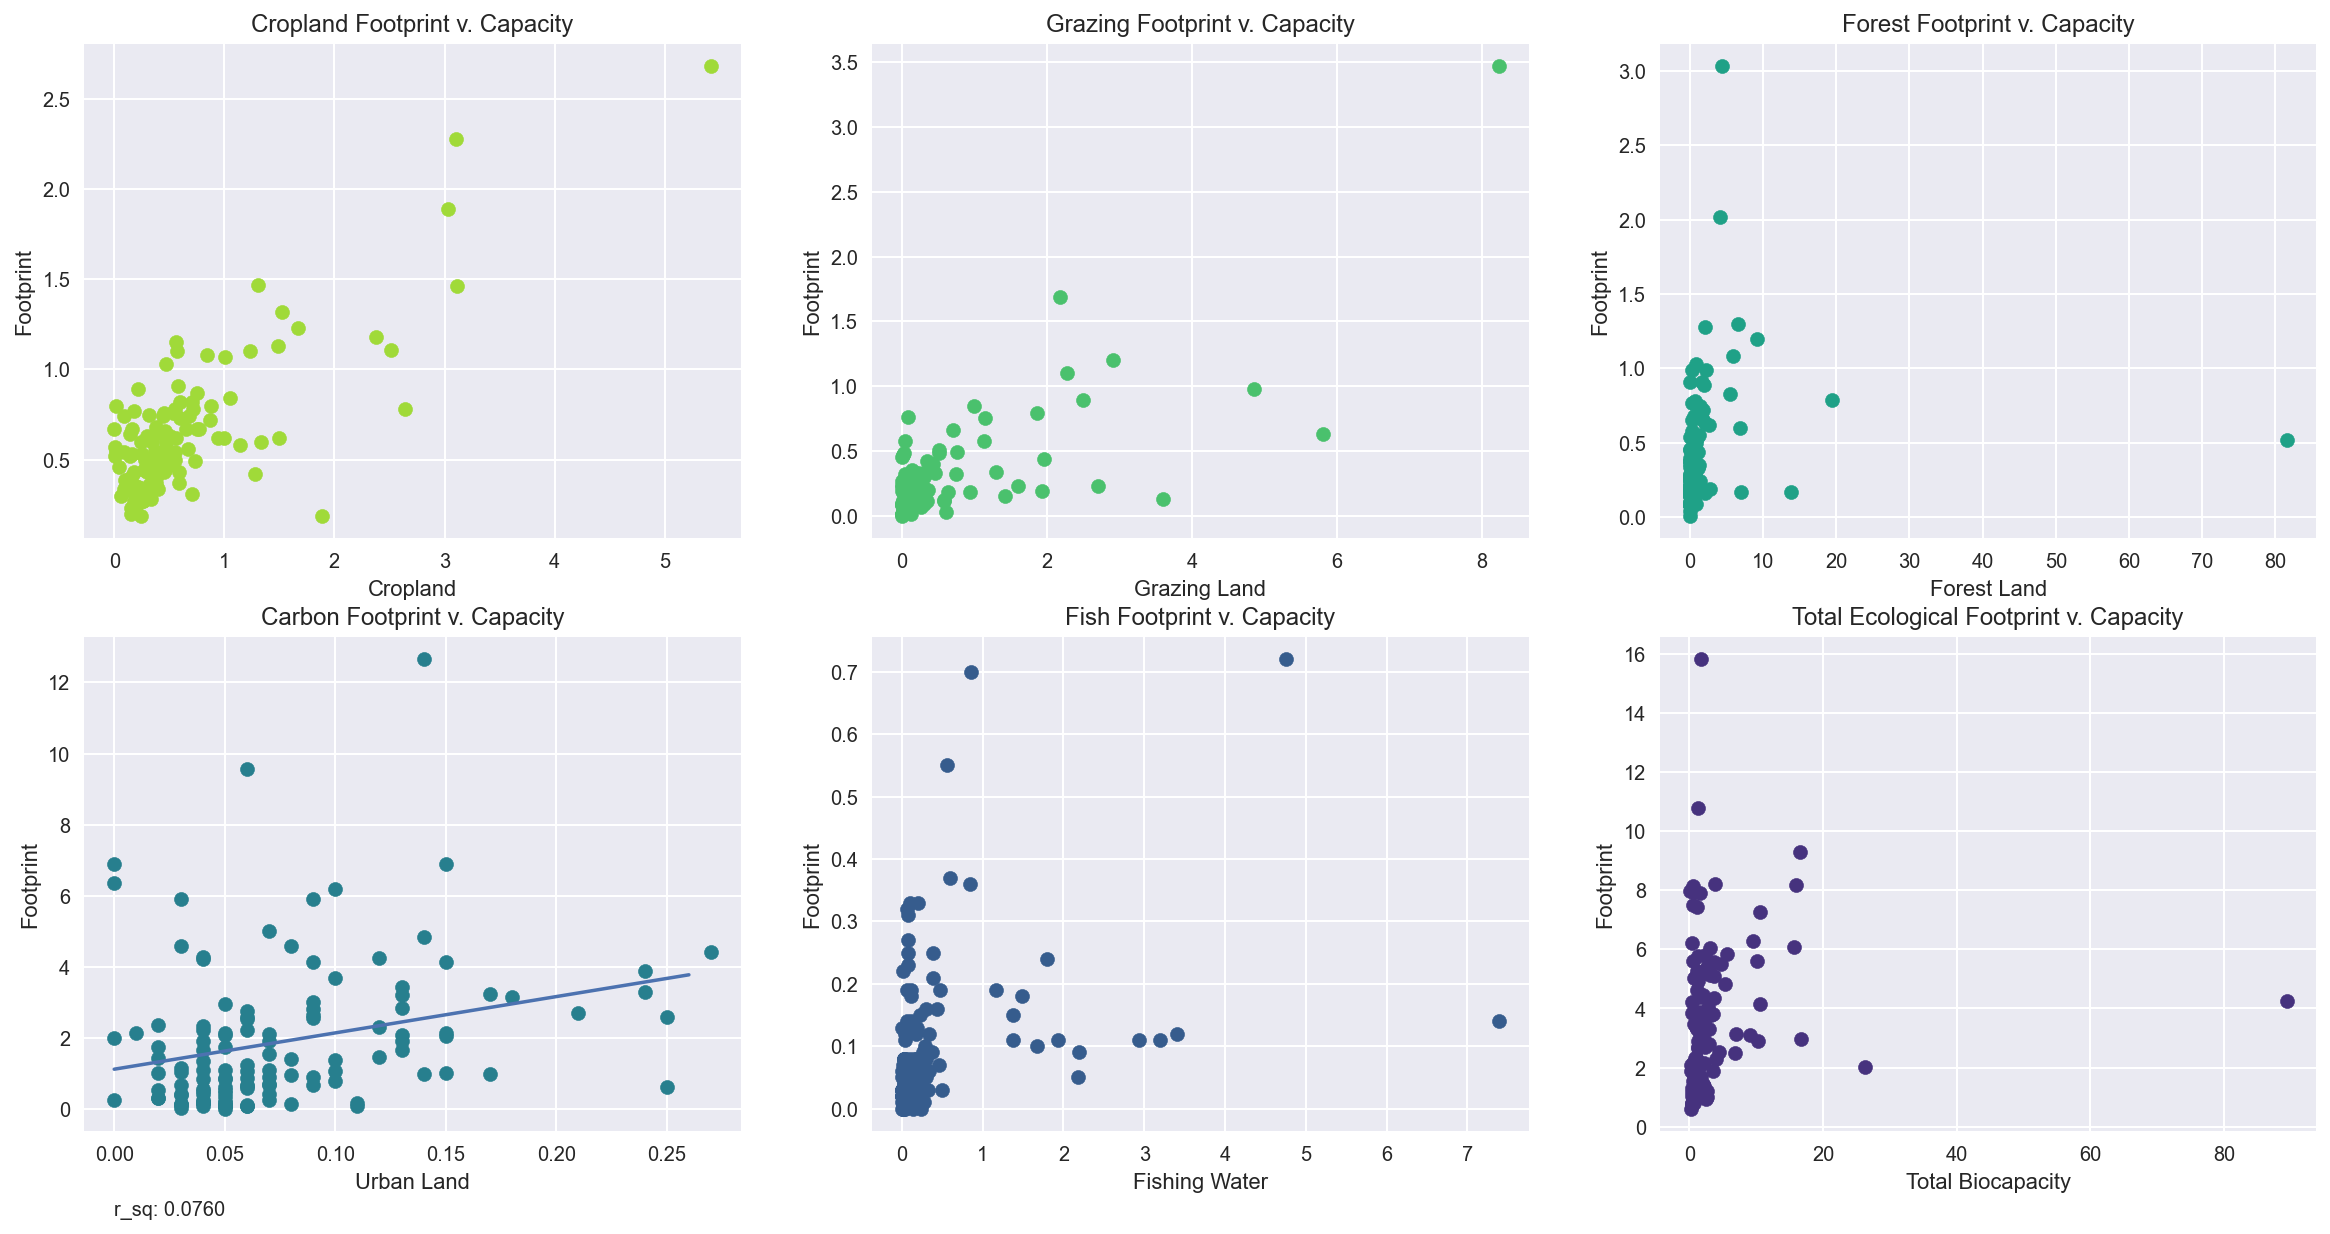

In [11]:
plot_footprint_cap(data, footprints, capacities, gdpColors)

# Data Analysis

## Footprint v. Happiness Score (slide 16)
r^2 = 0.4662

In [ ]:
plot_footprint_hap(data, footprints, capacities, gdpColors)

## Footprint v. GDP per Capita (slide 17)
r^2 = 0.8004

In [ ]:
plot_footprint_gdp(data, footprints, capacities, gdpColors)

# Case study: Bhutan

### Population histogram

In [ ]:
plot_hist_pop(data)

### GDP per Capita Histogram

In [ ]:
plot_hist_gdp(data)

### Bhutan marked on a scatter plot of Happiness Score vs.  Total Ecologial Footprint

In [ ]:
plot_scatter_markbhutan(data,gdpColors)